# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler, SMOTE

import kagglehub

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Importação do Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kapturovalexander/customers-churned-in-telecom-services")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customers-churned-in-telecom-services' dataset.
Path to dataset files: /kaggle/input/customers-churned-in-telecom-services


In [ ]:
files_in_directory = os.listdir(path)
print(f"Arquivos encontrados: {files_in_directory[0]}")

Arquivos encontrados: customer_churn_telecom_services.csv


In [ ]:
# Substitua 'nome_do_arquivo.csv' pelo nome real do arquivo no diretório
file_path = os.path.join(path, 'customer_churn_telecom_services.csv')

# Carregar o arquivo em um DataFrame
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do DataFrame
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
data_set = df.copy()
data_set.drop_duplicates(inplace=True)
data_set

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# A gente tira isso daqui por um padrao de nao olhar os dados como um todo, isso pode gerar bias na gente ...
# ... o ideal é somente olhar o split de teste
data_set.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Embora precisamos fazer outra coisa ainda, limpar todo o dataset, fazer OHE ou Dummy enconde, ou qualquer tipo de encode em colunas categoricas
# Precisamos ainda dar uma olhada no preenchimento (linhas com NaN tem que ser tratadas) e mais todo o pre processamento
# MAS SEM VER METRICAS DO DATASET!!!!

## Pré-processamento

### Tipos de dados das colunas

In [ ]:
data_set.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data_set.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### Dados faltantes

In [ ]:
data_set.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Apagar as linhas que nao tem total charges
data_set.dropna(inplace=True)

In [ ]:
data_set.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Tratamento de Colunas com yes-no

In [ ]:
data_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Aparentemente as colunas onde temos esse comportamento são:
- Partner
- Dependents
- PhoneService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- PaperlessBilling

Essas colunas devem ser tranformadas em colunas binarias

In [ ]:
# Colunas para corrigir
columns= ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Aplicando applymap
data_set[columns] = data_set[columns].applymap(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipython-input-3357551680.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_set[columns] = data_set[columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
# Conferindo Correcoes
for column in columns:
    print(f"Coluna {column}: {data_set[column].unique()}")

Coluna Partner: [1 0]
Coluna Dependents: [0 1]
Coluna PhoneService: [0 1]
Coluna OnlineSecurity: [0 1]
Coluna OnlineBackup: [1 0]
Coluna DeviceProtection: [0 1]
Coluna TechSupport: [0 1]
Coluna StreamingTV: [0 1]
Coluna StreamingMovies: [0 1]
Coluna PaperlessBilling: [1 0]
Coluna Churn: [0 1]


### Tratamento de colunas categoricas

Aqui temos algumas colunas categoricas que devemos ver como vamos lidar com elas:
- Gender
- Contract
- PaymentMethod

Ainda tmeos outras colunas que irao precisar de tratamento especial
- InternetService (Acho que o ideal seja Dummy Encoding pra isso)
- MultipleLines (Nao sei como tratar No phone Service e No) (Acho que simplesmente uma coluna MultipleLines com 1 para Yes e No para o resto)

In [ ]:
data_set['gender'] = data_set['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
data_set = pd.get_dummies(data_set, columns=['InternetService'], drop_first=False)

In [ ]:
#dummy enconding
data_set = pd.get_dummies(data_set, columns=['MultipleLines'], drop_first=True)

In [ ]:
#aqui trata a variável como nominal ordinal
contract_order = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
data_set['Contract'] = data_set['Contract'].map(contract_order)

In [ ]:
data_set = pd.get_dummies(data_set, columns=['PaymentMethod'], drop_first=False)

In [ ]:
# Olhando dataset por completo
for column in data_set.columns:
    print(f"Coluna {column}: {data_set[column].unique()}")

Coluna gender: [0 1]
Coluna SeniorCitizen: [0 1]
Coluna Partner: [1 0]
Coluna Dependents: [0 1]
Coluna tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Coluna PhoneService: [0 1]
Coluna OnlineSecurity: [0 1]
Coluna OnlineBackup: [1 0]
Coluna DeviceProtection: [0 1]
Coluna TechSupport: [0 1]
Coluna StreamingTV: [0 1]
Coluna StreamingMovies: [0 1]
Coluna Contract: [0 1 2]
Coluna PaperlessBilling: [1 0]
Coluna MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Coluna TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Coluna Churn: [0 1]
Coluna InternetService_DSL: [ True False]
Coluna InternetService_Fiber optic: [False  True]
Coluna InternetService_No: [False  True]
Coluna MultipleLines_No phone service: [ True False]
Coluna MultipleLines_Yes: [False  True]
Coluna PaymentMethod_Bank trans

# Separação de Treino, Teste e Validação

In [ ]:
# X (Variáveis Explicativas / Features): DataFrame sem a coluna 'Churn'
X = data_set.drop('Churn', axis=1)

# y (Variável Alvo / Target): Apenas a coluna 'Churn'
y = data_set['Churn']

In [ ]:
## Treino: 50%, Teste: 25%, Validação: 25%

# Primeiro: separa treino (50%) e temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Depois: divide o temporário em validação (10%) e teste (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [ ]:
print(f"Tamanho dos dados de treino: {X_train.shape[0]} | Porcentagem: {round(X_train.shape[0]/X.shape[0], 2)*100}%")
print(f"Tamanho dos dados de teste: {X_test.shape[0]} | Porcentagem: {round(X_test.shape[0]/X.shape[0], 2)*100}%")
print(f"Tamanho dos dados de validação: {X_val.shape[0]} | Porcentagem: {round(X_val.shape[0]/X.shape[0], 2)*100}%")

Tamanho dos dados de treino: 3505 | Porcentagem: 50.0%
Tamanho dos dados de teste: 1753 | Porcentagem: 25.0%
Tamanho dos dados de validação: 1752 | Porcentagem: 25.0%


In [ ]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols]   = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

## Checando desbalanceamento nos dados


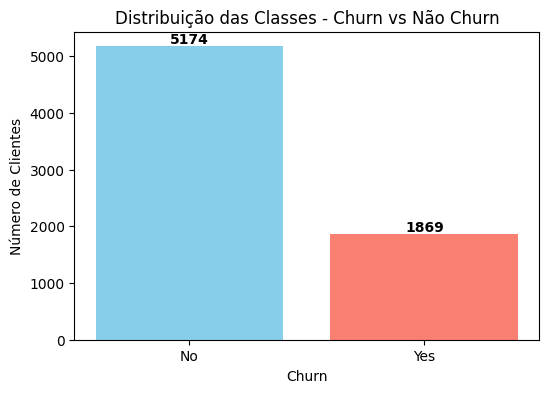


Proporções:
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


In [ ]:
# Contagem de cada classe
class_counts = df['Churn'].value_counts()

# Plot simples com Matplotlib
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribuição das Classes - Churn vs Não Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')

# Mostrar os valores em cima das barras
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.show()

# Mostrar proporções
print("\nProporções:")
print(class_counts / class_counts.sum())

In [ ]:
# Oversampling simples
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
X_val_over, y_val_over = ros.fit_resample(X_val, y_val)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_val_smote, y_val_smote = ros.fit_resample(X_val, y_val)

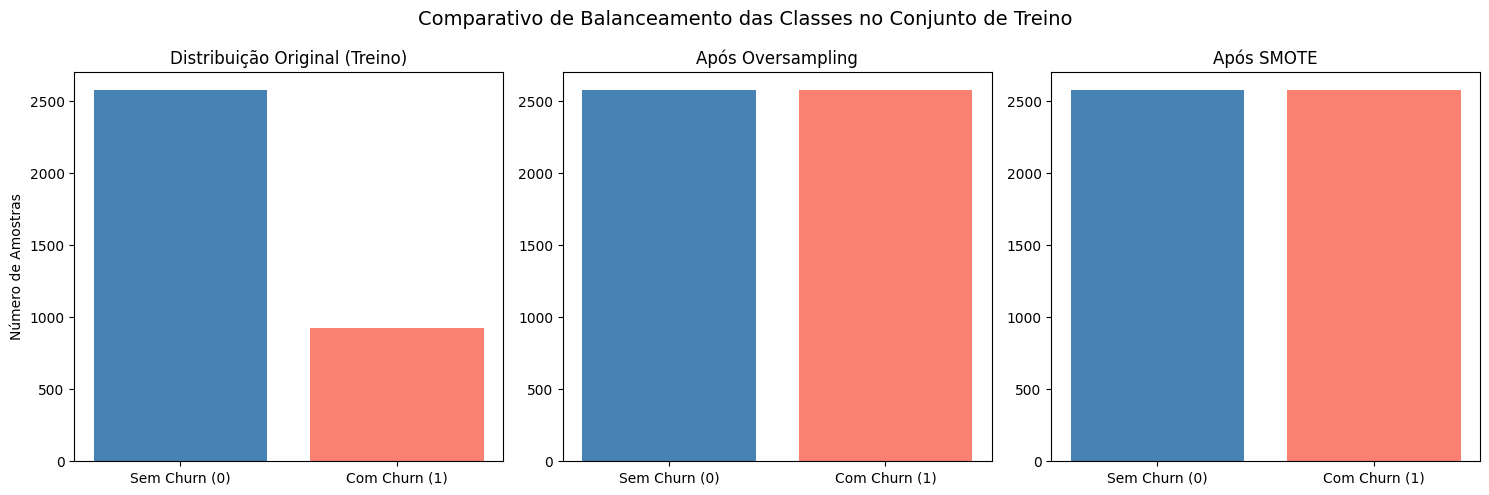

In [ ]:
# Contagens originais
orig_counts = y_train.value_counts().sort_index()
over_counts = y_train_over.value_counts().sort_index()
smote_counts = y_train_smote.value_counts().sort_index()

# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1 — Original
axes[0].bar(orig_counts.index, orig_counts.values, color=['steelblue', 'salmon'])
axes[0].set_title('Distribuição Original (Treino)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])
axes[0].set_ylabel('Número de Amostras')

# Gráfico 2 — Oversampling
axes[1].bar(over_counts.index, over_counts.values, color=['steelblue', 'salmon'])
axes[1].set_title('Após Oversampling')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])

# Gráfico 3 — SMOTE
axes[2].bar(smote_counts.index, smote_counts.values, color=['steelblue', 'salmon'])
axes[2].set_title('Após SMOTE')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])

# Ajustes gerais
plt.suptitle('Comparativo de Balanceamento das Classes no Conjunto de Treino', fontsize=14)
plt.tight_layout()
plt.show()

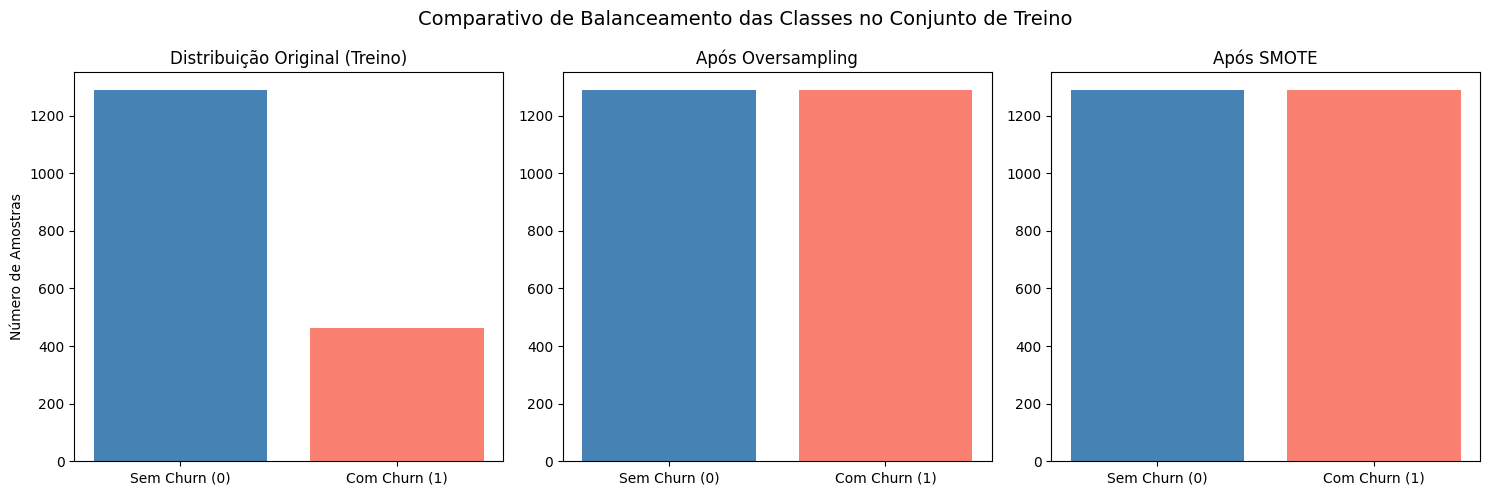

In [ ]:
# Contagens originais
orig_counts = y_val.value_counts().sort_index()
over_counts = y_val_over.value_counts().sort_index()
smote_counts = y_val_smote.value_counts().sort_index()

# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1 — Original
axes[0].bar(orig_counts.index, orig_counts.values, color=['steelblue', 'salmon'])
axes[0].set_title('Distribuição Original (Treino)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])
axes[0].set_ylabel('Número de Amostras')

# Gráfico 2 — Oversampling
axes[1].bar(over_counts.index, over_counts.values, color=['steelblue', 'salmon'])
axes[1].set_title('Após Oversampling')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])

# Gráfico 3 — SMOTE
axes[2].bar(smote_counts.index, smote_counts.values, color=['steelblue', 'salmon'])
axes[2].set_title('Após SMOTE')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Sem Churn (0)', 'Com Churn (1)'])

# Ajustes gerais
plt.suptitle('Comparativo de Balanceamento das Classes no Conjunto de Treino', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
X_train_over, y_train_over = shuffle(
    X_train_over, y_train_over, random_state=42
)

X_val_over, y_val_over = shuffle(
    X_val_over, y_val_over, random_state=42
)

X_train_smote, y_train_smote = shuffle(
    X_train_smote, y_train_over, random_state=42
)

X_val_smote, y_val_smote = shuffle(
    X_val_smote, y_val_smote, random_state=42
)

print(y_train_over)
print(y_val_over)
print(y_train_smote)
print(y_val_smote)

4557    1
486     1
2792    1
4451    1
2770    1
       ..
4426    1
466     0
3092    0
3772    1
860     0
Name: Churn, Length: 5154, dtype: int64
1127    1
932     1
759     0
318     0
2011    1
       ..
1638    0
1095    0
1130    1
1294    0
860     0
Name: Churn, Length: 2576, dtype: int64
2871    0
1600    1
2995    0
2766    0
172     1
       ..
66      0
1176    0
1443    1
520     0
4790    1
Name: Churn, Length: 5154, dtype: int64
1127    1
932     1
759     0
318     0
2011    1
       ..
1638    0
1095    0
1130    1
1294    0
860     0
Name: Churn, Length: 2576, dtype: int64


# Salvar os dados numa pasta no drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data_sets_classificacao_churn"
os.makedirs(path, exist_ok=True)

# reconstruir dataframes antes de salvar
X_train_over = pd.DataFrame(X_train_over, columns=X.columns)
y_train_over = pd.DataFrame(y_train_over)

X_val_over = pd.DataFrame(X_val_over, columns=X.columns)
y_val_over = pd.DataFrame(y_val_over)

X_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)
y_train_smote = pd.DataFrame(y_train_smote)

X_val_smote = pd.DataFrame(X_val_smote, columns=X.columns)
y_val_smote = pd.DataFrame(y_val_smote)

X_test = pd.DataFrame(X_test, columns=X.columns)
y_test = pd.DataFrame(y_test)

# salvar no drive

X_train_over.to_csv(f"{path}/X_train_over.csv", index=False)
y_train_over.to_csv(f"{path}/y_train_over.csv", index=False)

X_val_over.to_csv(f"{path}/X_val_over.csv", index=False)
y_val_over.to_csv(f"{path}/y_val_over.csv", index=False)

X_train_smote.to_csv(f"{path}/X_train_smote.csv", index=False)
y_train_smote.to_csv(f"{path}/y_train_smote.csv", index=False)

X_val_smote.to_csv(f"{path}/X_val_smote.csv", index=False)
y_val_smote.to_csv(f"{path}/y_val_smote.csv", index=False)

X_test.to_csv(f"{path}/X_test.csv", index=False)
y_test.to_csv(f"{path}/y_test.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
